In [1]:
import torch
import numpy as np

In [2]:
y = [4.209015  , 6.0251656 , 6.586659  , 1.0785204 , 5.323591,   2.9644287, 8.885769  , 9.895647  ,  6.464806  , 0.18034637, 1.2534696]
x = [34.552039 , 74.45411  , 80.987488 ,  3.458197 , 56.4778655, 26.98163  , 95.79415  , 106.228316 , 61.169422 , 1.089516 , 8.962632]

In [3]:
y = torch.tensor(y)
x = torch.tensor(x)
x

tensor([ 34.5520,  74.4541,  80.9875,   3.4582,  56.4779,  26.9816,  95.7942,
        106.2283,  61.1694,   1.0895,   8.9626])

In [4]:
def model(x, w, b):
    return w * x + b

In [5]:
def loss_fn(yy, y):
    squared_diffs = (yy - y)**2
    return squared_diffs.mean()

In [6]:
def dloss_fn(yy, y):
    dsq_diffs = 2 * (yy - y) / yy.size(0)
    return dsq_diffs 

In [7]:
def dmodel_dw(x, w, b):
    return x

In [8]:
def dmodel_db(x, w, b):
    return 1.0

In [9]:
def grad_fn(x, y, yy, w, b):
    dloss_dyy = dloss_fn(yy,y)
    dloss_dw = dloss_dyy * dmodel_dw(x, w, b)
    dloss_db = dloss_dyy * dmodel_db(x, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [10]:
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        yy = model(x, w, b)
        loss = loss_fn(yy, y)                
        grad = grad_fn(x, y, yy, w, b)        
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        print('\t Params: ', params)
        print('\t Grad: ', grad)
        
    return params

In [11]:
x = x * 0.1
x

tensor([ 3.4552,  7.4454,  8.0987,  0.3458,  5.6478,  2.6982,  9.5794, 10.6228,
         6.1169,  0.1090,  0.8963])

In [12]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    x = x,
    y = y)
params

Epoch 1, Loss 0.622568
	 Params:  tensor([ 0.9400, -0.0039])
	 Grad:  tensor([5.9979, 0.3906])
Epoch 2, Loss 0.399406
	 Params:  tensor([ 0.9257, -0.0017])
	 Grad:  tensor([ 1.4320, -0.2172])
Epoch 3, Loss 0.385859
	 Params:  tensor([0.9220, 0.0018])
	 Grad:  tensor([ 0.3730, -0.3561])
Epoch 4, Loss 0.383605
	 Params:  tensor([0.9207, 0.0057])
	 Grad:  tensor([ 0.1271, -0.3863])
Epoch 5, Loss 0.381978
	 Params:  tensor([0.9200, 0.0096])
	 Grad:  tensor([ 0.0698, -0.3913])
Epoch 6, Loss 0.380404
	 Params:  tensor([0.9194, 0.0135])
	 Grad:  tensor([ 0.0563, -0.3904])
Epoch 7, Loss 0.378853
	 Params:  tensor([0.9189, 0.0174])
	 Grad:  tensor([ 0.0529, -0.3883])
Epoch 8, Loss 0.377323
	 Params:  tensor([0.9184, 0.0212])
	 Grad:  tensor([ 0.0518, -0.3858])
Epoch 9, Loss 0.375813
	 Params:  tensor([0.9179, 0.0251])
	 Grad:  tensor([ 0.0513, -0.3832])
Epoch 10, Loss 0.374323
	 Params:  tensor([0.9174, 0.0289])
	 Grad:  tensor([ 0.0509, -0.3807])
Epoch 11, Loss 0.372852
	 Params:  tensor([0.91

	 Grad:  tensor([ 0.0084, -0.0628])
Epoch 282, Loss 0.265976
	 Params:  tensor([0.8536, 0.5061])
	 Grad:  tensor([ 0.0083, -0.0624])
Epoch 283, Loss 0.265936
	 Params:  tensor([0.8535, 0.5067])
	 Grad:  tensor([ 0.0083, -0.0620])
Epoch 284, Loss 0.265897
	 Params:  tensor([0.8534, 0.5074])
	 Grad:  tensor([ 0.0082, -0.0616])
Epoch 285, Loss 0.265859
	 Params:  tensor([0.8533, 0.5080])
	 Grad:  tensor([ 0.0082, -0.0612])
Epoch 286, Loss 0.265821
	 Params:  tensor([0.8532, 0.5086])
	 Grad:  tensor([ 0.0081, -0.0608])
Epoch 287, Loss 0.265783
	 Params:  tensor([0.8532, 0.5092])
	 Grad:  tensor([ 0.0081, -0.0604])
Epoch 288, Loss 0.265746
	 Params:  tensor([0.8531, 0.5098])
	 Grad:  tensor([ 0.0080, -0.0600])
Epoch 289, Loss 0.265710
	 Params:  tensor([0.8530, 0.5104])
	 Grad:  tensor([ 0.0080, -0.0596])
Epoch 290, Loss 0.265674
	 Params:  tensor([0.8529, 0.5110])
	 Grad:  tensor([ 0.0079, -0.0592])
Epoch 291, Loss 0.265638
	 Params:  tensor([0.8528, 0.5116])
	 Grad:  tensor([ 0.0079, -0.0

Epoch 562, Loss 0.263055
	 Params:  tensor([0.8430, 0.5852])
	 Grad:  tensor([ 0.0013, -0.0097])
Epoch 563, Loss 0.263054
	 Params:  tensor([0.8430, 0.5853])
	 Grad:  tensor([ 0.0013, -0.0096])
Epoch 564, Loss 0.263053
	 Params:  tensor([0.8430, 0.5854])
	 Grad:  tensor([ 0.0013, -0.0096])
Epoch 565, Loss 0.263052
	 Params:  tensor([0.8430, 0.5854])
	 Grad:  tensor([ 0.0013, -0.0095])
Epoch 566, Loss 0.263051
	 Params:  tensor([0.8429, 0.5855])
	 Grad:  tensor([ 0.0013, -0.0095])
Epoch 567, Loss 0.263050
	 Params:  tensor([0.8429, 0.5856])
	 Grad:  tensor([ 0.0013, -0.0094])
Epoch 568, Loss 0.263049
	 Params:  tensor([0.8429, 0.5857])
	 Grad:  tensor([ 0.0012, -0.0093])
Epoch 569, Loss 0.263048
	 Params:  tensor([0.8429, 0.5858])
	 Grad:  tensor([ 0.0012, -0.0093])
Epoch 570, Loss 0.263047
	 Params:  tensor([0.8429, 0.5859])
	 Grad:  tensor([ 0.0012, -0.0092])
Epoch 571, Loss 0.263047
	 Params:  tensor([0.8429, 0.5860])
	 Grad:  tensor([ 0.0012, -0.0091])
Epoch 572, Loss 0.263046
	 Par

	 Grad:  tensor([ 0.0002, -0.0015])
Epoch 844, Loss 0.262984
	 Params:  tensor([0.8413, 0.5975])
	 Grad:  tensor([ 0.0002, -0.0015])
Epoch 845, Loss 0.262984
	 Params:  tensor([0.8413, 0.5975])
	 Grad:  tensor([ 0.0002, -0.0015])
Epoch 846, Loss 0.262984
	 Params:  tensor([0.8413, 0.5975])
	 Grad:  tensor([ 0.0002, -0.0015])
Epoch 847, Loss 0.262984
	 Params:  tensor([0.8413, 0.5975])
	 Grad:  tensor([ 0.0002, -0.0015])
Epoch 848, Loss 0.262984
	 Params:  tensor([0.8413, 0.5975])
	 Grad:  tensor([ 0.0002, -0.0015])
Epoch 849, Loss 0.262984
	 Params:  tensor([0.8413, 0.5976])
	 Grad:  tensor([ 0.0002, -0.0014])
Epoch 850, Loss 0.262984
	 Params:  tensor([0.8413, 0.5976])
	 Grad:  tensor([ 0.0002, -0.0014])
Epoch 851, Loss 0.262984
	 Params:  tensor([0.8413, 0.5976])
	 Grad:  tensor([ 0.0002, -0.0014])
Epoch 852, Loss 0.262984
	 Params:  tensor([0.8413, 0.5976])
	 Grad:  tensor([ 0.0002, -0.0014])
Epoch 853, Loss 0.262984
	 Params:  tensor([0.8413, 0.5976])
	 Grad:  tensor([ 0.0002, -0.0

	 Grad:  tensor([ 2.8908e-05, -2.2869e-04])
Epoch 1127, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.9504e-05, -2.2706e-04])
Epoch 1128, Loss 0.262983
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.8968e-05, -2.2560e-04])
Epoch 1129, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.8610e-05, -2.2411e-04])
Epoch 1130, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.8849e-05, -2.2258e-04])
Epoch 1131, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.9147e-05, -2.2095e-04])
Epoch 1132, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.7716e-05, -2.1977e-04])
Epoch 1133, Loss 0.262983
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.8074e-05, -2.1816e-04])
Epoch 1134, Loss 0.262983
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.7537e-05, -2.1676e-04])
Epoch 1135, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.6822e-05, -2.1545e-04])
Ep

Epoch 1420, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 3.0994e-06, -3.2499e-05])
Epoch 1421, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 2.3842e-07, -3.2693e-05])
Epoch 1422, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 5.2452e-06, -3.1918e-05])
Epoch 1423, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 3.2187e-06, -3.1896e-05])
Epoch 1424, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([-5.3644e-07, -3.2142e-05])
Epoch 1425, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 5.6028e-06, -3.1196e-05])
Epoch 1426, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 4.4107e-06, -3.1121e-05])
Epoch 1427, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 4.1723e-07, -3.1479e-05])
Epoch 1428, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 3.2783e-06, -3.0808e-05])
Epoch 1429, Loss 0.262982
	 Params:  tensor([0

	 Grad:  tensor([ 8.3447e-07, -4.9546e-06])
Epoch 1708, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 8.3447e-07, -4.9546e-06])
Epoch 1709, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 1.5497e-06, -4.8354e-06])
Epoch 1710, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 3.0994e-06, -4.5374e-06])
Epoch 1711, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([-8.3447e-07, -5.0291e-06])
Epoch 1712, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([-8.3447e-07, -4.9993e-06])
Epoch 1713, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 8.3447e-07, -4.7907e-06])
Epoch 1714, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.6226e-06, -4.6045e-06])
Epoch 1715, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.6226e-06, -4.5449e-06])
Epoch 1716, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.8610e-06, -4.4331e-06])
Ep

	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2004, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2005, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2006, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2007, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2008, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2009, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2010, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2011, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2012, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

Epoch 2298, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2299, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2300, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2301, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2302, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2303, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2304, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2305, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2306, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2307, Loss 0.262982
	 Params:  tensor([0

	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2591, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2592, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2593, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2594, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2595, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2596, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2597, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2598, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2599, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

Epoch 2877, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2878, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2879, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2880, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2881, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2882, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2883, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2884, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2885, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2886, Loss 0.262982
	 Params:  tensor([0

	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3173, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3174, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3175, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3176, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3177, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3178, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3179, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3180, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3181, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  t

Epoch 3471, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3472, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3473, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3474, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3475, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3476, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3477, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3478, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3479, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3480, Loss 0.262982
	 Params:  tensor([0

Epoch 3761, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3762, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3763, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3764, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3765, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3766, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3767, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3768, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3769, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3770, Loss 0.262982
	 Params:  tensor([0

	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4052, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4053, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4054, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4055, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4056, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4057, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4058, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4059, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4060, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  t

	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4328, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4329, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4330, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4331, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4332, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4333, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4334, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4335, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4336, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

Epoch 4604, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4605, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4606, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4607, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4608, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4609, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4610, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4611, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4612, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4613, Loss 0.262982
	 Params:  tensor([0

Epoch 4884, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4885, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4886, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4887, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4888, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4889, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4890, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4891, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4892, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4893, Loss 0.262982
	 Params:  tensor([0

tensor([0.8410, 0.5997])

In [13]:
yy = model(x, *params)
w, b = params
x, w, b, yy

(tensor([ 3.4552,  7.4454,  8.0987,  0.3458,  5.6478,  2.6982,  9.5794, 10.6228,
          6.1169,  0.1090,  0.8963]),
 tensor(0.8410),
 tensor(0.5997),
 tensor([3.5057, 6.8616, 7.4111, 0.8906, 5.3498, 2.8690, 8.6564, 9.5340, 5.7443,
         0.6913, 1.3535]))

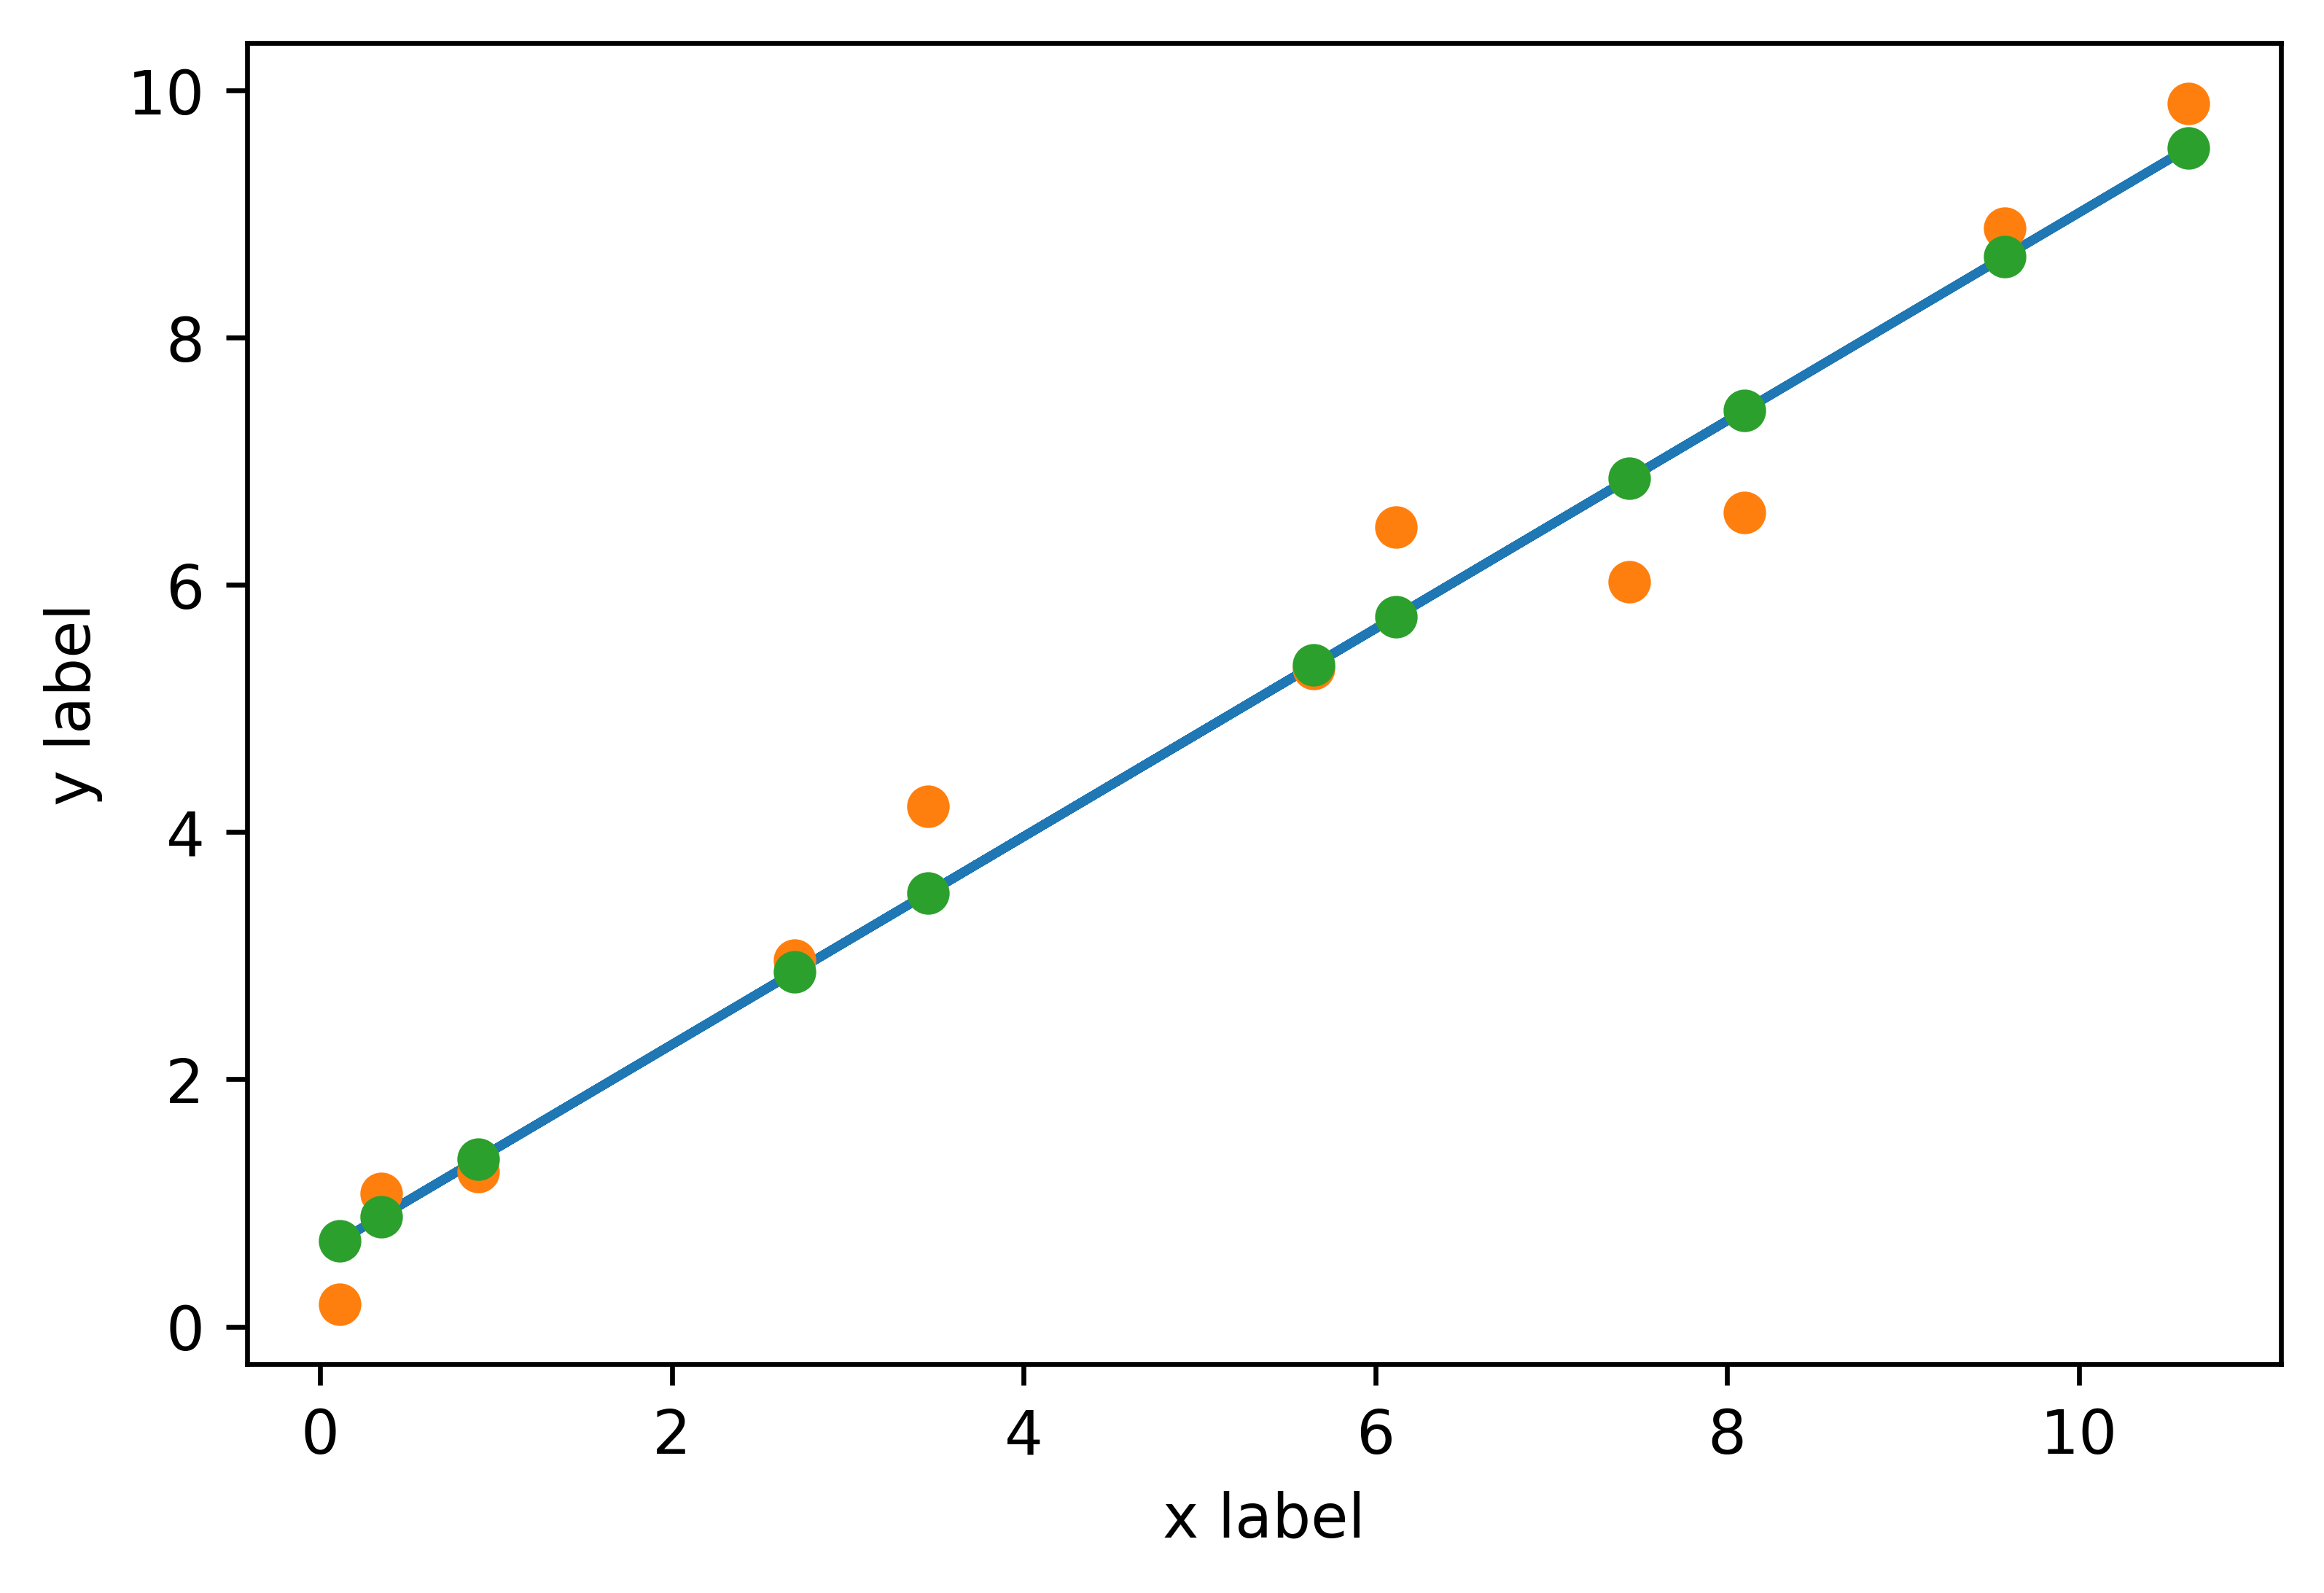

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(dpi=600)
plt.xlabel("x label")
plt.ylabel("y label")
plt.plot(x.numpy(), yy.detach().numpy())
plt.plot(x.numpy(), y.numpy(), 'o')
plt.plot(x.numpy(), yy.detach().numpy(),'o')

plt.savefig("dl_ch1t2_plot01.png", format="png")